### Etape 1: Importation des données:

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
try:
    df = pd.read_csv("notes_etudiants_100_lignes.csv")
    print("✅ Fichier chargé avec succès !")
except FileNotFoundError:
    print("❌ Erreur : Fichier introuvable. Vérifiez le chemin ou le nom.")

❌ Erreur : Fichier introuvable. Vérifiez le chemin ou le nom.


### Etape 2 Exploration des données

In [7]:
print("\n=== Premières lignes ===")
print(df.head())

print("\n=== Informations générales ===")
print(df.info())

print("\n=== Valeurs manquantes ===")
print(df.isnull().sum())


=== Premières lignes ===
   id_etudiant      nom  prenom        matiere  note     classe  annee
0            1   Dupont    Jean  Mathématiques    15  Terminale   2023
1            2   Martin  Sophie       Physique    12  Terminale   2023
2            3  Bernard  Pierre  Mathématiques     8   Première   2023
3            4    Petit   Lucie       Physique    17  Terminale   2023
4            5   Moreau  Thomas  Mathématiques    10   Première   2023

=== Informations générales ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id_etudiant  100 non-null    int64 
 1   nom          100 non-null    object
 2   prenom       100 non-null    object
 3   matiere      100 non-null    object
 4   note         100 non-null    int64 
 5   classe       100 non-null    object
 6   annee        100 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 5.

### Etape 3: Manipulation des données: Création d'une colonne "mention"

In [15]:
df['mention'] = df['note'].apply(
    lambda x: 'Excellent' if x >= 16 else 
              'Très bien' if x >= 14 else 
              'Bien' if x >= 12 else 
              'Passable' if x >= 10 else 
              'Insuffisant'
)
# Filtrage des étudiants de Terminale
terminale = df[df['classe'] == 'Terminale']

### Etape 4: Analyse statistique 

In [18]:
print("\n=== Statistiques par matière ===")
print(df.groupby('matiere')['note'].describe())

print("\n=== Moyenne par classe ===")
print(df.groupby('classe')['note'].mean().round(2))


=== Statistiques par matière ===
               count  mean       std  min   25%   50%   75%   max
matiere                                                          
Mathématiques   50.0  12.4  3.037185  8.0  10.0  13.0  15.0  16.0
Physique        50.0  12.6  2.755329  9.0  11.0  12.0  14.0  17.0

=== Moyenne par classe ===
classe
Première      9.0
Terminale    14.0
Name: note, dtype: float64


### Etape 5: Visualisation Histogramme des notes

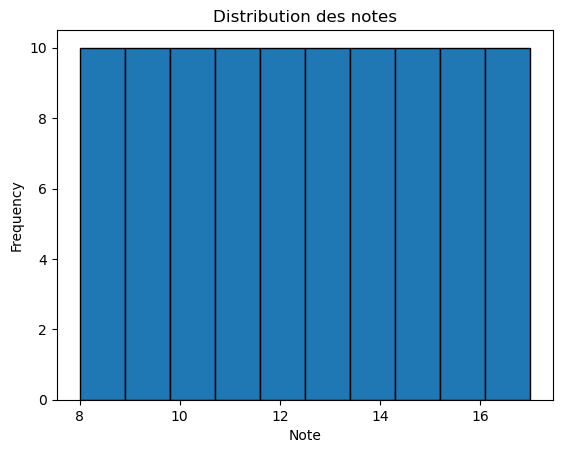

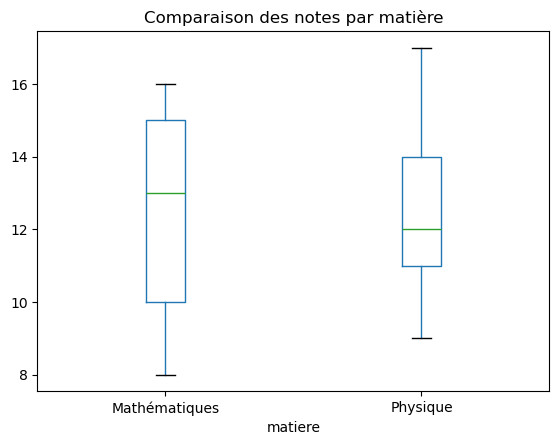

In [21]:
df['note'].plot(
    kind='hist',
    bins=10,
    title='Distribution des notes',
    edgecolor='black'
)
plt.xlabel('Note')
plt.show()

df.boxplot(column='note', by='matiere', grid=False)
plt.title('Comparaison des notes par matière')
plt.suptitle('')  # Supprime le titre automatique
plt.show()

### Etape 6: Export des résultats

In [24]:
df.to_csv('resultats_analyse.csv', index=False)
print("\n Résultats exportés dans 'resultats_analyse.csv'")


 Résultats exportés dans 'resultats_analyse.csv'
